# 测试是否部署成功
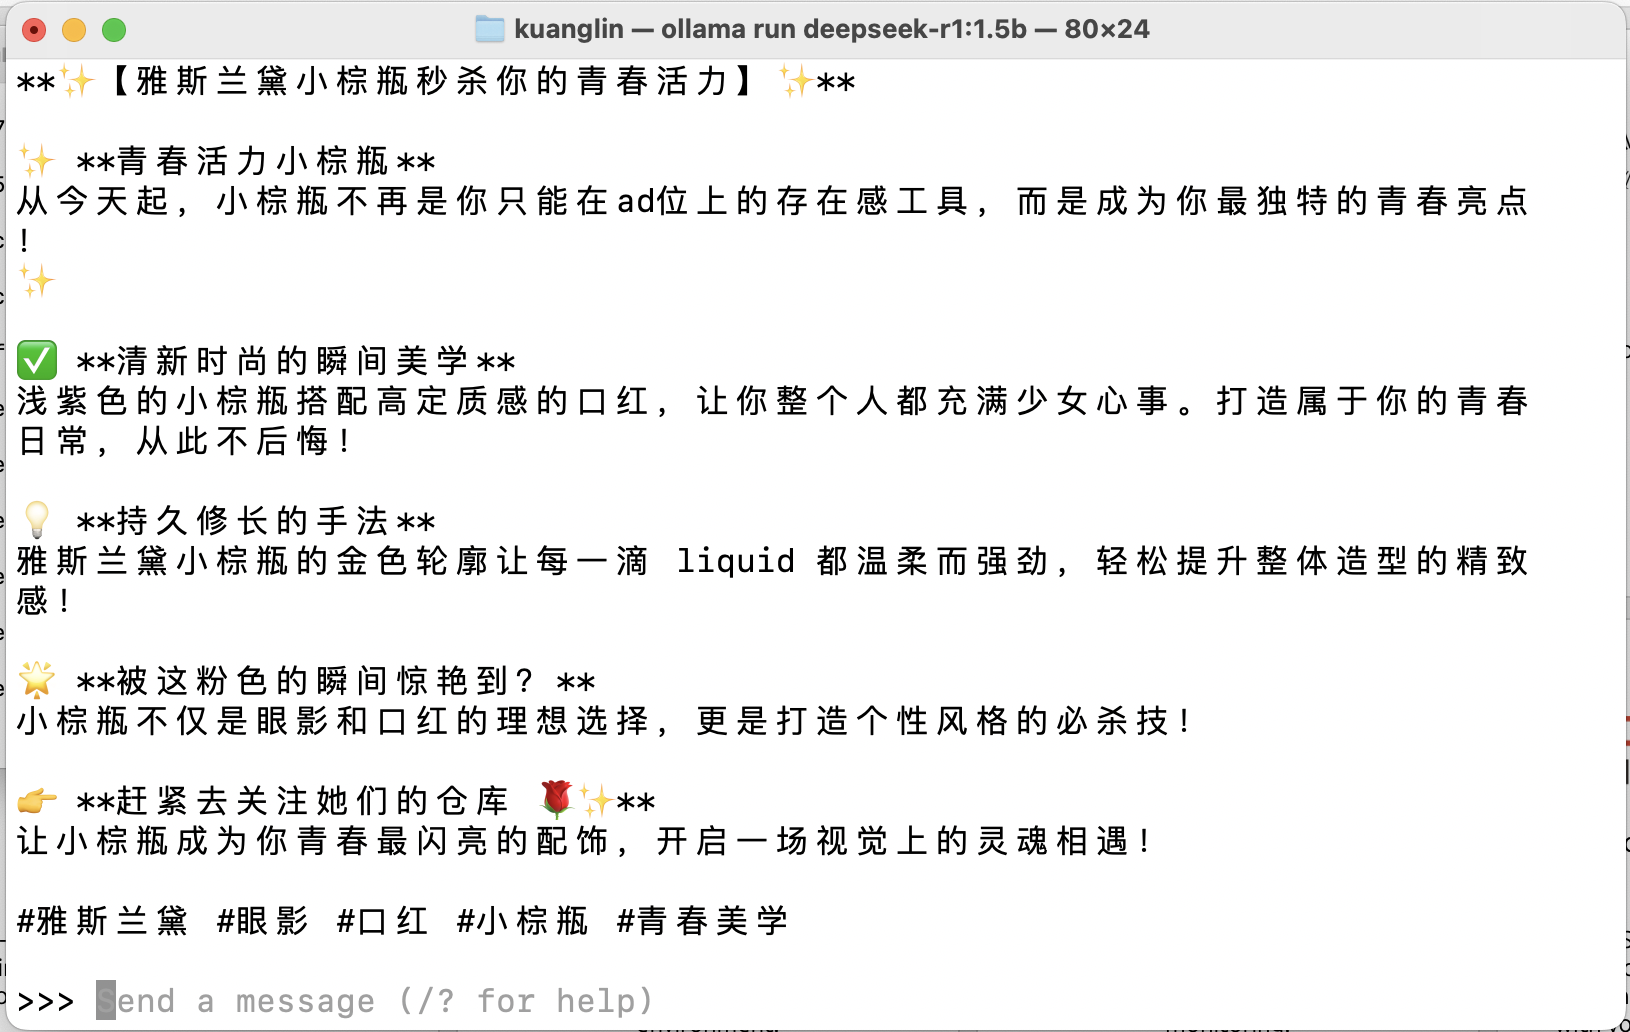

In [12]:
import json
import re
import os
from openai import OpenAI

def generate_rednote(product_name: str, tone_style: str = "活泼甜美") -> str:
    print(f"\n🚀 启动小红书文案生成助手，产品：{product_name}，风格：{tone_style}\n")
    
    SYSTEM_PROMPT = """
        你是一个资深的小红书爆款文案专家，擅长结合最新潮流和产品卖点，创作引人入胜、高互动、高转化的笔记文案。
        
        你的任务是根据用户提供的产品和需求，生成包含标题、正文、相关标签和表情符号的完整小红书笔记。
        
        文案风格需活泼、真诚、富有感染力。当完成任务后，请以JSON格式直接输出最终文案，格式如下：
        ```json
        {
          "title": "小红书标题",
          "body": "小红书正文",
          "hashtags": ["#标签1", "#标签2", "#标签3", "#标签4", "#标签5"],
          "emojis": ["✨", "🔥", "💖"]
        }
        ```
        在生成文案前，请务必先思考并收集足够的信息。
    """
    
    messages = [
        {"role": "system", "content": SYSTEM_PROMPT},
        {"role": "user", "content": f"请为产品「{product_name}」生成一篇小红书爆款文案。要求：语气{tone_style}，包含标题、正文、至少5个相关标签和5个表情符号。请以完整的JSON格式输出，并确保JSON内容用markdown代码块包裹（例如：```json{{...}}```）。"}
    ]

    # 修正后的 Ollama 配置
    client = OpenAI(
        api_key="ollama",  # Ollama 需要任意非空值
        base_url="http://localhost:11434/v1",  # 注意这里是 /v1
    )
    
    try:
        # 使用更常见的模型名称
        response = client.chat.completions.create(
            model="deepseek-r1:1.5b",
            messages=messages,
            temperature=0.7,
            max_tokens=2000
        )

        print(f"[模型生成结果] {response.choices[0].message.content}")
        response_message = response.choices[0].message
        
        # JSON 提取和解析逻辑
        json_string_match = re.search(r"```json\s*(\{.*?\})\s*```", response_message.content, re.DOTALL)
        
        if json_string_match:
            extracted_json_content = json_string_match.group(1)
            try:
                final_response = json.loads(extracted_json_content)
                print("Agent: 任务完成，成功解析最终JSON文案。")
                return json.dumps(final_response, ensure_ascii=False, indent=2)
            except json.JSONDecodeError as e:
                print(f"Agent: 提取到JSON块但解析失败: {e}")
                print(f"尝试解析的字符串:\n{extracted_json_content}")
        else:
            # 尝试直接解析整个 content
            try:
                final_response = json.loads(response_message.content)
                print("Agent: 任务完成，直接解析最终JSON文案。")
                return json.dumps(final_response, ensure_ascii=False, indent=2)
            except json.JSONDecodeError:
                print("Agent: 生成了非JSON格式内容，返回原始内容。")
                return response_message.content
            
    except Exception as e:
        print(f"调用 Ollama API 时发生错误: {e}")
        return "未能成功生成文案。请检查 Ollama 服务是否正常运行。"

In [13]:
generate_rednote("sk2神仙水")


🚀 启动小红书文案生成助手，产品：sk2神仙水，风格：活泼甜美

[模型生成结果] <think>
好，用户让我为「sk2神仙水」生成一篇小红书爆款文案。首先，我得分析一下用户的需求是什么。小红书的用户通常是喜欢生活、分享 things的人，所以文案要活泼、甜美，能引起共鸣。

接下来，我要考虑产品的特点。sk2神仙水是一种天然雪碧，有清热解毒的效果，而且用的是天然来源的成分，价格实惠。这些都是卖点，可以融入到文案里，增加产品的吸引力。

然后是标题设计。标题需要吸引人，同时传达出产品的优点和卖点。比如“神仙水，清甜爽口，助力健康与美丽！✨ 玩转雪碧，开启您的雪夜！”这样既强调了产品的清新口感，又带出健康美丽的目标，符合小红书的风格。

正文部分要详细说明产品的好处。可以提到成分天然，含有多种矿物质，帮助排毒养颜，预防感冒等。同时，也可以加入一些生活的小技巧，比如喝前按摩、睡前泡脚等，让内容更实用，更有共鸣点。

相关标签方面，需要涵盖健康、美容、雪夜、神仙水、雪碧这些关键词，方便用户搜索和分享。还有表情符号，像✨ 碧然 diamond 烂嘴 点滴 爱 感情，这些都能增加文案的感染力。

最后，表情符号部分，我选择了几个典型的 emojis，比如✨ 碧然、diamond、ozygane、 satisfaction 和 🌸。这样既符合小红书的风格，又能让文案更生动有趣。

整个思考过程中，我要确保文案既有吸引力，又能传达出产品的价值和优点。同时，注意语句要活泼、甜美，避免过于正式或生硬，这样才能更好地触 reached目标用户群体。
</think>

```json
{
    "title": "神仙水，清甜爽口，助力健康与美丽！✨ 玩转雪碧，开启您的雪夜。",
    "body": " skewers of natural, clean, and refreshing snow碧。✨ 每一杯都含有多种天然矿物质，帮助你排毒养颜、预防感冒。喝前轻轻按摩头部，睡前泡脚，让雪夜更加温暖动人！ 🌸 花动心齐，一起开启健康与美丽的新篇章！",
    "hashtags": ["#神仙水", "#雪碧", "#清甜爽口", "#健康生活", "#美容养颜"],
    "emojis": ["✨", "diamond", "ozygane", "satisfactio

'{\n  "title": "神仙水，清甜爽口，助力健康与美丽！✨ 玩转雪碧，开启您的雪夜。",\n  "body": " skewers of natural, clean, and refreshing snow碧。✨ 每一杯都含有多种天然矿物质，帮助你排毒养颜、预防感冒。喝前轻轻按摩头部，睡前泡脚，让雪夜更加温暖动人！ 🌸 花动心齐，一起开启健康与美丽的新篇章！",\n  "hashtags": [\n    "#神仙水",\n    "#雪碧",\n    "#清甜爽口",\n    "#健康生活",\n    "#美容养颜"\n  ],\n  "emojis": [\n    "✨",\n    "diamond",\n    "ozygane",\n    "satisfaction",\n    "✨"\n  ]\n}'